In [20]:
from davitpy import pydarn
import datetime
import numpy
import pandas
import altair as alt
alt.renderers.enable('notebook')
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
startTime = datetime.datetime(2017,12,2)
endTime = datetime.datetime(2017,12,3)
radSel = 'bks'
fileType = 'fitacf3'
filtered = False

In [3]:
f = pydarn.sdio.radDataOpen(startTime, radSel,
                    endTime, filtered=filtered,
                    fileType=fileType)

In [4]:
mb = pydarn.sdio.radDataReadAll(f)

In [5]:
stest1 = time.time()
x = []
# we'll create a dataframe with all the data
# To keep things simple (at this moment), I'm
# not using multi-indexed dataframe.
# Initialize empty arrays for the data
# these will later be converted to a DF
qflgArr = numpy.empty([0])
gateArr = numpy.empty([0])
velArr = numpy.empty([0])
spwArr = numpy.empty([0])
pwrArr = numpy.empty([0])
gflgArr = numpy.empty([0])
dtArr = numpy.empty([0])
bmArr = numpy.empty([0])
for n, m in enumerate(mb):
#     print numpy.array(m.fit.qflg )
    if m is None:
        continue
    if m.fit is None:
        continue
    if m.fit.v is None:
        continue
    qflgArr = numpy.concatenate( ( qflgArr, numpy.array(m.fit.qflg ) ) )
    gateArr = numpy.concatenate( ( gateArr, numpy.array(m.fit.slist ) ) )
    velArr = numpy.concatenate( ( velArr, numpy.array(m.fit.v ) ) )
    spwArr = numpy.concatenate( ( spwArr, numpy.array(m.fit.w_l ) ) )
    pwrArr = numpy.concatenate( ( pwrArr, numpy.array(m.fit.p_l ) ) )
    gflgArr = numpy.concatenate( ( gflgArr, numpy.array(m.fit.gflg ) ) )
    # date and bmnum are a little different
    dtArr = numpy.concatenate( ( dtArr, numpy.full( (len(m.fit.qflg)), m.time) ) )
    bmArr = numpy.concatenate( ( bmArr, numpy.full( (len(m.fit.qflg)), m.bmnum) ) )
dfx = pandas.DataFrame( {
    "qflg" : qflgArr,
    "gate" : gateArr,
    "vel" : velArr,
    "spw" : spwArr,
    "pwr" : pwrArr,
    "gflg" : gflgArr,
    "time" : dtArr,
    "beam" : bmArr,
})
# Convert int cols to int16
# they are being stored as 
# floats now! save space!
print "time cons1--->", time.time()-stest1
intCols = [ "qflg", "gate", "gflg", "beam" ]
dfx[intCols] = dfx[intCols].astype(numpy.int16)

time cons1---> 52.5075590611


In [6]:
dfx.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343476 entries, 0 to 343475
Data columns (total 8 columns):
beam    343476 non-null int16
gate    343476 non-null int16
gflg    343476 non-null int16
pwr     343476 non-null float64
qflg    343476 non-null int16
spw     343476 non-null float64
time    343476 non-null datetime64[ns]
vel     343476 non-null float64
dtypes: datetime64[ns](1), float64(3), int16(4)
memory usage: 13.1 MB


In [7]:
# # alt.data_transformers.enable('json')
# alt.Chart(dfx).mark_circle(size=60).encode(
#     x=alt.X('time', axis=alt.Axis(title='Time (UT)')),
#     y=alt.Y('vel', axis=alt.Axis(title='Velocity [m/s]')),
#     color='beam',
#     tooltip=['vel', 'spw', 'pwr']
# ).properties(
#     title='Fitacf3 Vel vs time plot'
# ).interactive().save("/tmp/test2.json")

In [8]:
# alt.Chart(dfx).mark_bar().encode(
#     alt.X("vel:Q", bin=True),
#     y='count()',
# ).save("test.html")

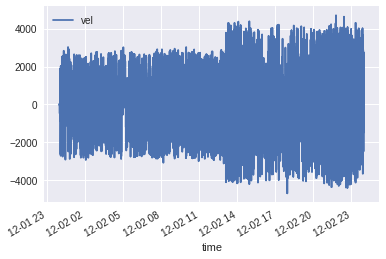

In [22]:
# dfx.plot(x='time',y='vel')